In [ ]:
#Installing relevant packages
! pip install afinn
! pip install scikit-plot
! pip install umap-learn
! pip install keybert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53431 sha256=c42953219051ea3b71a2a10744f4f80dd0fbcfd43d49b5b6129fe40444df4438
  Stored in directory: /root/.cache/pip/wheels/ee/d3/a0/f9255ebac29886acb1c28b35b37523f6399677fa06be379f25
Successfully built afinn
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Basic libraries
import pandas as pd
import numpy as np
from datetime import datetime

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn preprocessing and models
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics.pairwise import euclidean_distances

# Text processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TweetTokenizer
import spacy
from spacy import displacy
from afinn import Afinn
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from keybert import KeyBERT

# Clustering and distance calculation
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform
from scipy.interpolate import interp1d as interp
from scipy.stats import pearsonr
from scipy.sparse import hstack

# Dimensionality reduction
import umap.umap_ as umap

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


# Data Prepocessing


In [ ]:
df = pd.read_json('/drive/MyDrive/prethesis /renttherunway_final_data.json', lines=True)

In [ ]:
df.rename(columns={'bust size': 'bust_size', 'rented for': 'rented_for', 'body type':'body_type'}, inplace=True)

In [ ]:
df.shape

(192544, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192544 non-null  object 
 1   user_id         192544 non-null  int64  
 2   bust_size       174133 non-null  object 
 3   item_id         192544 non-null  int64  
 4   weight          162562 non-null  object 
 5   rating          192462 non-null  float64
 6   rented_for      192534 non-null  object 
 7   review_text     192544 non-null  object 
 8   body_type       177907 non-null  object 
 9   review_summary  192544 non-null  object 
 10  category        192544 non-null  object 
 11  height          191867 non-null  object 
 12  size            192544 non-null  int64  
 13  age             191584 non-null  float64
 14  review_date     192544 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 22.0+ MB


In [ ]:
df.head()

fit  user_id bust_size  item_id  weight  rating     rented_for  \
0  fit   420272       34d  2260466  137lbs    10.0       vacation   
1  fit   273551       34b   153475  132lbs    10.0          other   
2  fit   360448       NaN  1063761     NaN    10.0          party   
3  fit   909926       34c   126335  135lbs     8.0  formal affair   
4  fit   151944       34b   616682  145lbs    10.0        wedding   

                                         review_text          body_type  \
0  An adorable romper! Belt and zipper were a lit...          hourglass   
1  I rented this dress for a photo shoot. The the...  straight & narrow   
2  This hugged in all the right places! It was a ...                NaN   
3  I rented this for my company's black tie award...               pear   
4  I have always been petite in my upper body and...           athletic   

                                      review_summary category height  size  \
0                               So many compliments!   romper  5' 8"    14   
1                            I felt so glamourous!!!     gown  5' 6"    12   
2  It was a great time to celebrate the (almost) ...   sheath  5' 4"     4   
3   Dress arrived on time and in perfect condition.     dress  5' 5"     8   
4                    Was in love with this dress !!!     gown  5' 9"    12   

     age         review_date  
0   28.0      April 20, 2016  
1   36.0       June 18, 2013  
2  116.0   December 14, 2015  
3   34.0   February 12, 2014  
4   27.0  September 26, 2016

# Handle missing value (NAN VAL)

In [ ]:
df.isna().sum()

fit                   0
user_id               0
bust_size         18411
item_id               0
weight            29982
rating               82
rented_for           10
review_text           0
body_type         14637
review_summary        0
category              0
height              677
size                  0
age                 960
review_date           0
dtype: int64

In [ ]:
def fill_missing(df):
    for col in df.columns:
        if df[col].isna().sum() > 0:
            if df[col].dtype == 'object':
                df[col].fillna(df[col].mode()[0], inplace=True)
            else:
                df[col].fillna(df[col].median(), inplace=True)
    return df

In [ ]:
fill_missing(df)

fit  user_id bust_size  item_id  weight  rating     rented_for  \
0       fit   420272       34d  2260466  137lbs    10.0       vacation   
1       fit   273551       34b   153475  132lbs    10.0          other   
2       fit   360448       34b  1063761  130lbs    10.0          party   
3       fit   909926       34c   126335  135lbs     8.0  formal affair   
4       fit   151944       34b   616682  145lbs    10.0        wedding   
...     ...      ...       ...      ...     ...     ...            ...   
192539  fit    66386      34dd  2252812  140lbs    10.0           work   
192540  fit   118398       32c   682043  100lbs    10.0           work   
192541  fit    47002       36a   683251  135lbs     6.0       everyday   
192542  fit   961120       36c   126335  165lbs    10.0        wedding   
192543  fit   123612       36b   127865  155lbs    10.0        wedding   

                                              review_text          body_type  \
0       An adorable romper! Belt and zipper were a lit...          hourglass   
1       I rented this dress for a photo shoot. The the...  straight & narrow   
2       This hugged in all the right places! It was a ...          hourglass   
3       I rented this for my company's black tie award...               pear   
4       I have always been petite in my upper body and...           athletic   
...                                                   ...                ...   
192539                                  Fit like a glove!          hourglass   
192540  The pattern contrast on this dress is really s...             petite   
192541  Like the other DVF wraps, the fit on this is f...  straight & narrow   
192542  This dress was PERFECTION.  it looked incredib...               pear   
192543  This dress was wonderful! I had originally pla...           athletic   

                                           review_summary  category height  \
0                                    So many compliments!    romper  5' 8"   
1                                 I felt so glamourous!!!      gown  5' 6"   
2       It was a great time to celebrate the (almost) ...    sheath  5' 4"   
3        Dress arrived on time and in perfect condition.      dress  5' 5"   
4                         Was in love with this dress !!!      gown  5' 9"   
...                                                   ...       ...    ...   
192539       LOVE IT!!! First Item Im thinking of buying!  jumpsuit  5' 9"   
192540                                           LOVE it!     dress  5' 1"   
192541                    Loud patterning, flattering fit     dress  5' 8"   
192542  loved this dress it was comfortable and photog...     dress  5' 6"   
192543  I wore this to a beautiful black tie optional ...      gown  5' 6"   

        size    age         review_date  
0         14   28.0      April 20, 2016  
1         12   36.0       June 18, 2013  
2          4  116.0   December 14, 2015  
3          8   34.0   February 12, 2014  
4         12   27.0  September 26, 2016  
...      ...    ...                 ...  
192539     8   42.0        May 18, 2016  
192540     4   29.0  September 30, 2016  
192541     8   31.0       March 4, 2016  
192542    16   31.0   November 25, 2015  
192543    16   30.0     August 29, 2017  

[192544 rows x 15 columns]

In [ ]:
#data after fillna
df.isna().sum()

fit               0
user_id           0
bust_size         0
item_id           0
weight            0
rating            0
rented_for        0
review_text       0
body_type         0
review_summary    0
category          0
height            0
size              0
age               0
review_date       0
dtype: int64

In [ ]:
df.isna().sum().sum()

np.int64(0)

coverting data type for easy classification

In [ ]:
df.head()

fit  user_id bust_size  item_id  weight  rating     rented_for  \
0  fit   420272       34d  2260466  137lbs    10.0       vacation   
1  fit   273551       34b   153475  132lbs    10.0          other   
2  fit   360448       34b  1063761  130lbs    10.0          party   
3  fit   909926       34c   126335  135lbs     8.0  formal affair   
4  fit   151944       34b   616682  145lbs    10.0        wedding   

                                         review_text          body_type  \
0  An adorable romper! Belt and zipper were a lit...          hourglass   
1  I rented this dress for a photo shoot. The the...  straight & narrow   
2  This hugged in all the right places! It was a ...          hourglass   
3  I rented this for my company's black tie award...               pear   
4  I have always been petite in my upper body and...           athletic   

                                      review_summary category height  size  \
0                               So many compliments!   romper  5' 8"    14   
1                            I felt so glamourous!!!     gown  5' 6"    12   
2  It was a great time to celebrate the (almost) ...   sheath  5' 4"     4   
3   Dress arrived on time and in perfect condition.     dress  5' 5"     8   
4                    Was in love with this dress !!!     gown  5' 9"    12   

     age         review_date  
0   28.0      April 20, 2016  
1   36.0       June 18, 2013  
2  116.0   December 14, 2015  
3   34.0   February 12, 2014  
4   27.0  September 26, 2016

In [ ]:
df['bust_size'].unique()

array(['34d', '34b', '34c', '32b', '34d+', '36d', '36a', '32d+', '36c',
       '32c', '32dd', '30dd', '32d', '36b', '34a', '34dd', '40ddd/e',
       '32a', '38d+', '38c', '34ddd/e', '38a', '38b', '38d', '36ddd/e',
       '38dd', '38f', '42dd', '36dd', '40g', '40dd', '28f', '30ddd/e',
       '32ddd/e', '28b', '36d+', '40d', '28dd', '34f', '42c', '30d',
       '30b', '42d', '34aa', '32aa', '36f', '28c', '40b', '36aa', '34g',
       '32f', '42ddd/e', '40c', '28g', '28aa', '36g', '30a', '44ddd/e',
       '30c', '30aa', '44dd', '32i', '32g', '30g', '38h', '30h', '34j',
       '38ddd/e', '32h', '28a', '44d', '40h', '38g', '34h', '36j', '40f',
       '36h', '28ddd/e', '44f', '34i', '30f', '36i', '30i', '28h', '42b',
       '42j', '32j', '46c', '48d', '38aa', '38i', '48dd', '28d', '28i',
       '46ddd/e', '42g', '44c', '42f', '40j', '38j', '46f', '44b', '44g',
       '42h', '40i', '44h'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192544 non-null  object 
 1   user_id         192544 non-null  int64  
 2   bust_size       192544 non-null  object 
 3   item_id         192544 non-null  int64  
 4   weight          192544 non-null  object 
 5   rating          192544 non-null  float64
 6   rented_for      192544 non-null  object 
 7   review_text     192544 non-null  object 
 8   body_type       192544 non-null  object 
 9   review_summary  192544 non-null  object 
 10  category        192544 non-null  object 
 11  height          192544 non-null  object 
 12  size            192544 non-null  int64  
 13  age             192544 non-null  float64
 14  review_date     192544 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 22.0+ MB


In [ ]:
def feet_to_float(cell_string):
    try:
        split_strings = cell_string.replace('"','').replace("'",'').split()
        float_value = float(split_strings[0])*12+float(split_strings[1])
    except:
        float_value = np.nan
    return float_value

In [ ]:
def preprocess_data(df):
    df.rename(columns={'bust size': 'bust_size', 'rented for': 'rented_for', 'body type':'body_type'}, inplace=True)
    fill_missing(df)
    df['weight'] = df['weight'].str.replace('lbs', '').astype('float64') # because 'weight' dtypes is object, we need to change to float
    df['height'] = df['height'].apply(feet_to_float)
    df['review_date'] = pd.to_datetime(df['review_date'])
    df = df[(df['age'] <= 100) & (df['size'] <= 22)]
    df.reset_index(drop=True, inplace=True)
    return df

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df['height']

0         5' 8"
1         5' 6"
2         5' 4"
3         5' 5"
4         5' 9"
          ...  
192539    5' 9"
192540    5' 1"
192541    5' 8"
192542    5' 6"
192543    5' 6"
Name: height, Length: 192544, dtype: object

In [ ]:
preprocess_data(df)

fit  user_id bust_size  item_id  weight  rating     rented_for  \
0       fit   420272       34d  2260466   137.0    10.0       vacation   
1       fit   273551       34b   153475   132.0    10.0          other   
2       fit   909926       34c   126335   135.0     8.0  formal affair   
3       fit   151944       34b   616682   145.0    10.0        wedding   
4       fit   734848       32b   364092   138.0     8.0           date   
...     ...      ...       ...      ...     ...     ...            ...   
171123  fit    66386      34dd  2252812   140.0    10.0           work   
171124  fit   118398       32c   682043   100.0    10.0           work   
171125  fit    47002       36a   683251   135.0     6.0       everyday   
171126  fit   961120       36c   126335   165.0    10.0        wedding   
171127  fit   123612       36b   127865   155.0    10.0        wedding   

                                              review_text          body_type  \
0       An adorable romper! Belt and zipper were a lit...          hourglass   
1       I rented this dress for a photo shoot. The the...  straight & narrow   
2       I rented this for my company's black tie award...               pear   
3       I have always been petite in my upper body and...           athletic   
4       Didn't actually wear it. It fit perfectly. The...           athletic   
...                                                   ...                ...   
171123                                  Fit like a glove!          hourglass   
171124  The pattern contrast on this dress is really s...             petite   
171125  Like the other DVF wraps, the fit on this is f...  straight & narrow   
171126  This dress was PERFECTION.  it looked incredib...               pear   
171127  This dress was wonderful! I had originally pla...           athletic   

                                           review_summary  category  height  \
0                                    So many compliments!    romper    68.0   
1                                 I felt so glamourous!!!      gown    66.0   
2        Dress arrived on time and in perfect condition.      dress    65.0   
3                         Was in love with this dress !!!      gown    69.0   
4                         Traditional with a touch a sass     dress    68.0   
...                                                   ...       ...     ...   
171123       LOVE IT!!! First Item Im thinking of buying!  jumpsuit    69.0   
171124                                           LOVE it!     dress    61.0   
171125                    Loud patterning, flattering fit     dress    68.0   
171126  loved this dress it was comfortable and photog...     dress    66.0   
171127  I wore this to a beautiful black tie optional ...      gown    66.0   

        size   age review_date  
0         14  28.0  2016-04-20  
1         12  36.0  2013-06-18  
2          8  34.0  2014-02-12  
3         12  27.0  2016-09-26  
4          8  45.0  2016-04-30  
...      ...   ...         ...  
171123     8  42.0  2016-05-18  
171124     4  29.0  2016-09-30  
171125     8  31.0  2016-03-04  
171126    16  31.0  2015-11-25  
171127    16  30.0  2017-08-29  

[171128 rows x 15 columns]

# Exploratory Data Analysis (EDA)

In [ ]:
print(df['fit'].unique())
print((df['body_type'].unique()))
print((df['category'].unique()))

['fit' 'small' 'large']
['hourglass' 'straight & narrow' 'pear' 'athletic' 'full bust' 'petite'
 'apple']
['romper' 'gown' 'sheath' 'dress' 'leggings' 'top' 'jumpsuit' 'sweater'
 'jacket' 'shirtdress' 'maxi' 'shift' 'pants' 'shirt' 'mini' 'skirt'
 'pullover' 'blouse' 'suit' 'coat' 'trench' 'bomber' 'cape' 'blazer'
 'vest' 'duster' 'ballgown' 'tank' 'poncho' 'frock' 'tunic' 'cardigan'
 'culottes' 'down' 'trouser' 'midi' 'pant' 'legging' 'print' 'knit'
 'culotte' 'sweatshirt' 'peacoat' 'kaftan' 'overalls' 'jogger' 'tee'
 'combo' 'henley' 'cami' 'blouson' 'turtleneck' 'trousers' 'overcoat'
 'hoodie' 't-shirt' 'caftan' 'tight' 'kimono' 'for' 'crewneck' 'skirts'
 'parka' 'buttondown' 'skort' 'sweatershirt' 'sweatpants' 'jeans']


In [ ]:
def plot_distribution(df, column='rented_for', hue=None):
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x=column, hue=hue)
    plt.xticks(rotation=45)
    plt.title('User’s purpose for the product')
    plt.show()


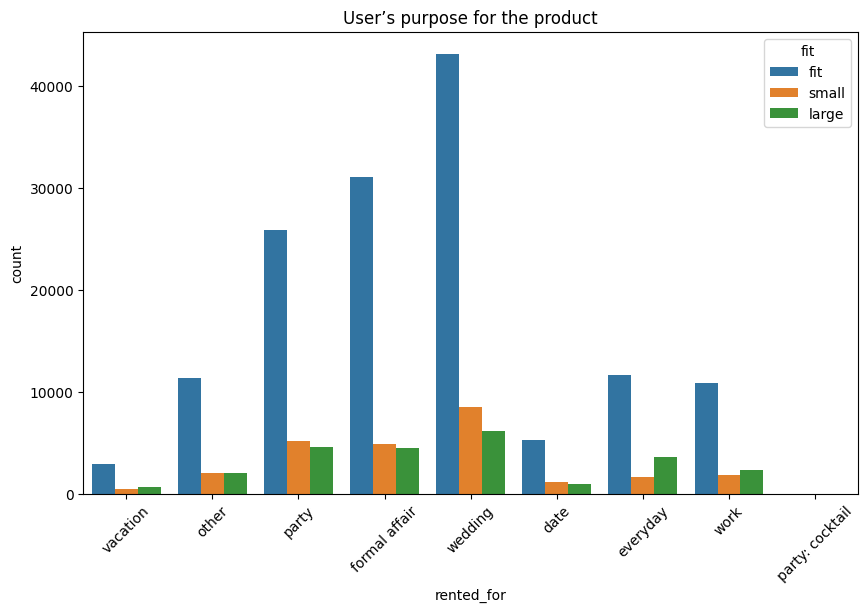

In [ ]:
plot_distribution(df, hue='fit')

From the graph above, we can see that most people rent clothes for weddings and formal affairs. Across all the renting purposes, most people found the size that fits their body

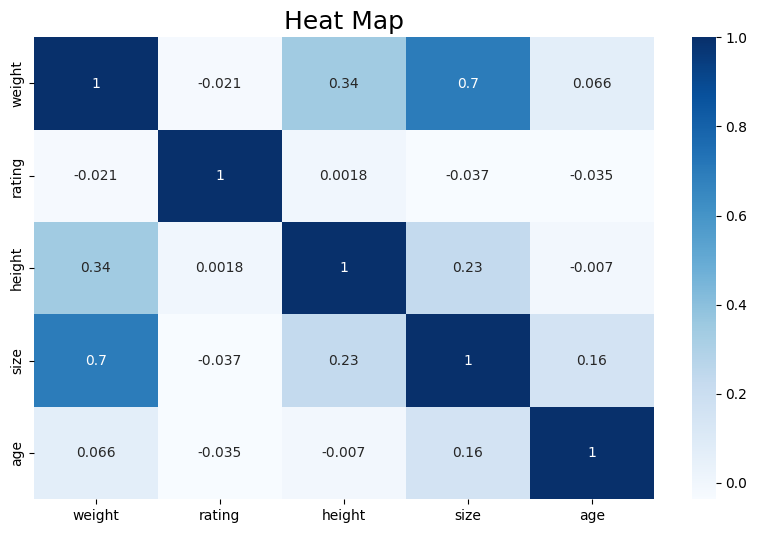

In [ ]:
plt.figure(figsize=(10,6))
#Select only numeric columns and compute the correlation matrix
sns.heatmap(df.drop(['user_id', 'item_id'], axis=1).select_dtypes(include=['number']).corr(), cmap='Blues', annot=True)
plt.title('Heat Map', size=18)
plt.show()
#chiều cao cân năng có liên qua tới size, strong relationship weight x size

In [ ]:
df.describe()

user_id       item_id         weight         rating  \
count  192544.000000  1.925440e+05  192544.000000  192544.000000   
mean   499494.100149  1.045684e+06     136.240709       9.092758   
min         9.000000  1.233730e+05      50.000000       2.000000   
25%    250654.250000  1.950760e+05     125.000000       8.000000   
50%    499419.000000  9.483960e+05     130.000000      10.000000   
75%    750974.000000  1.678888e+06     145.000000      10.000000   
max    999997.000000  2.966087e+06     300.000000      10.000000   
std    289059.719328  8.053148e+05      20.300468       1.429862   

              height           size            age  \
count  192544.000000  192544.000000  192544.000000   
mean       65.306013      12.245175      33.861689   
min        54.000000       0.000000       0.000000   
25%        63.000000       8.000000      29.000000   
50%        65.000000      12.000000      32.000000   
75%        67.000000      16.000000      37.000000   
max        78.000000      58.000000     117.000000   
std         2.659925       8.494877       8.039050   

                         review_date  
count                         192544  
mean   2016-03-19 06:20:34.452384512  
min              2010-11-03 00:00:00  
25%              2015-04-08 00:00:00  
50%              2016-06-20 00:00:00  
75%              2017-05-15 00:00:00  
max              2018-01-08 00:00:00  
std                              NaN

/tmp/ipython-input-27-2403134496.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df,x='size',hue='rented_for')


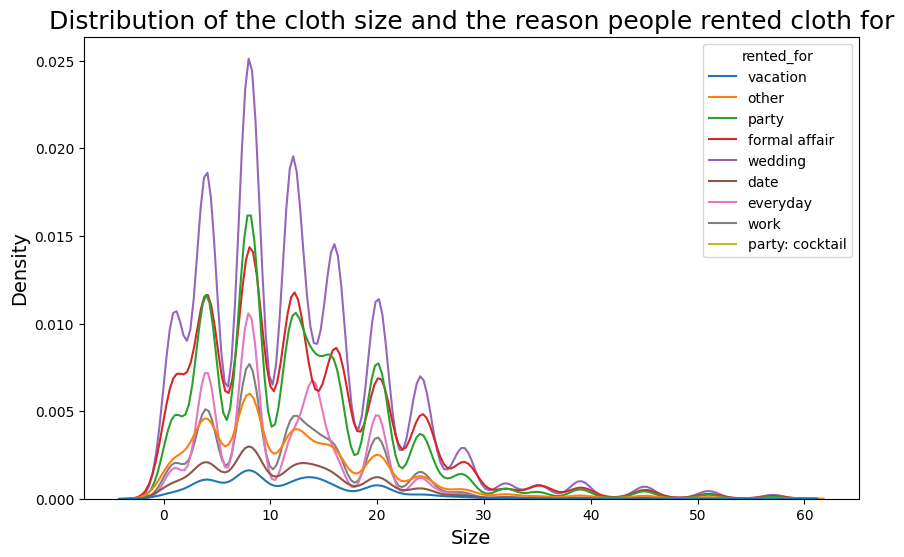

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df,x='size',hue='rented_for')
plt.title('Distribution of the cloth size and the reason people rented cloth for', size = 18)
plt.xlabel('Size', size = 14)
plt.ylabel('Density', size = 14)
plt.show()

most sizes falls into the range between 5 and 15 for all purposes.

In [ ]:
from scipy.stats import pearsonr


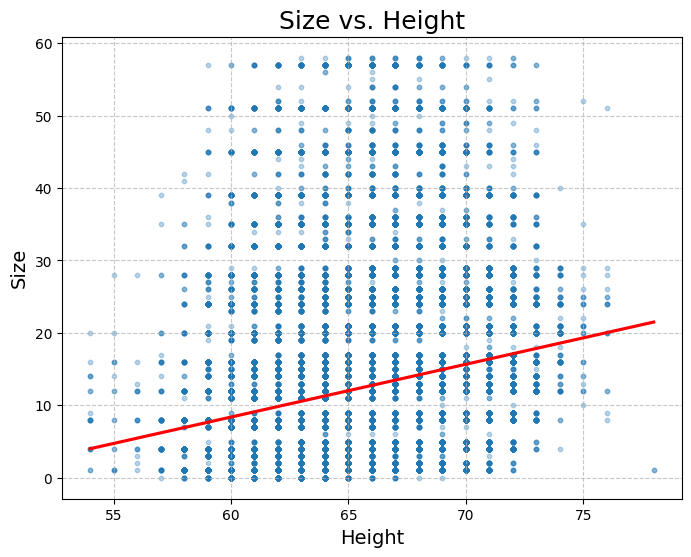

In [ ]:
# scatter plot + regression line SIZE X HEIGHT
plt.figure(figsize=(8,6))
sns.regplot(
    x='height',
    y='size',
    data=df,
    scatter_kws={'s':10, 'alpha':0.3}, # giảm độ đậm và size điểm
    line_kws={"color":"red"}
)
plt.title('Size vs. Height', fontsize=18)
plt.xlabel('Height', fontsize=14)
plt.ylabel('Size', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
r_height_size, _ = pearsonr(df['height'], df['size'])
print(f"The Pearson correlation coefficient of size vs height: {r_height_size:.2f}")

The Pearson correlation coefficient of size vs height: 0.23


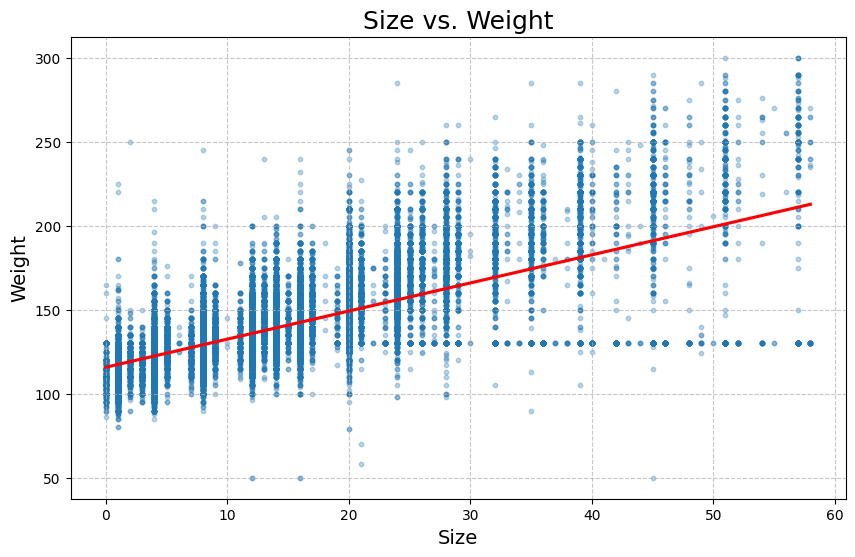

In [ ]:
# scatter plot + regression line SIZE X WEIGHT
plt.figure(figsize=(10,6))
sns.regplot(
    x='size',
    y='weight',
    data=df,
    scatter_kws={'s':10, 'alpha':0.3},  # giảm size và độ trong suốt
    line_kws={"color":"red"}             # đường hồi quy màu đỏ
)
plt.title('Size vs. Weight', fontsize=18)
plt.xlabel('Size', fontsize=14)
plt.ylabel('Weight', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
from scipy.stats import zscore
df['z_size'] = zscore(df['size'])
df['z_weight'] = zscore(df['weight'])
df = df[(df['z_size'].abs() < 3) & (df['z_weight'].abs() < 3)]
df.drop(columns=['z_size', 'z_weight'], inplace=True)

/tmp/ipython-input-32-3568271433.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['z_size', 'z_weight'], inplace=True)


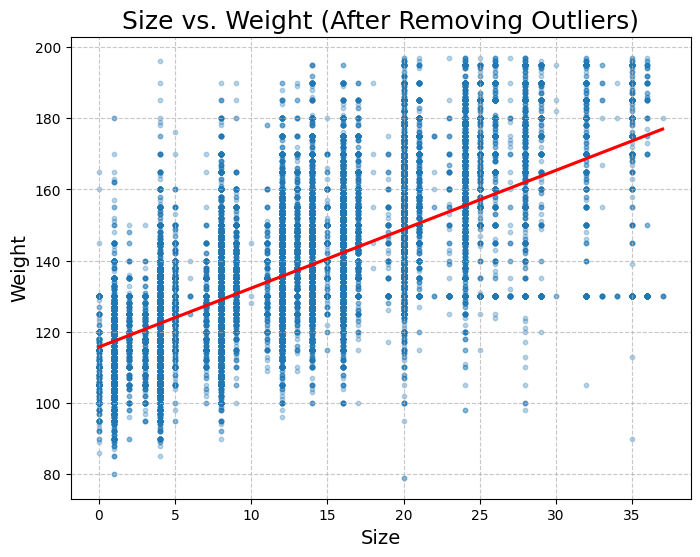

In [ ]:
# Scatter plot + regression line AFTER filtering outliers (Size vs. Weight)
plt.figure(figsize=(8, 6))
sns.regplot(
    x='size',
    y='weight',
    data=df,  # dùng df đã lọc
    scatter_kws={'s': 10, 'alpha': 0.3},
    line_kws={"color": "red"}
)
plt.title('Size vs. Weight (After Removing Outliers)', fontsize=18)
plt.xlabel('Size', fontsize=14)
plt.ylabel('Weight', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [ ]:
r_size_weight, _ = pearsonr(df['size'], df['weight'])
print(f"The Pearson correlation coefficient of size vs weight: {r_size_weight:.2f}")

The Pearson correlation coefficient of size vs weight: 0.69


x-axis: size <br>
y-axis: weight <br>
this is a positive correlation, we can assume that people who have more weight usually buy larger clothes

/tmp/ipython-input-35-2471405076.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(b.get_xticklabels(), rotation=40, ha="right")


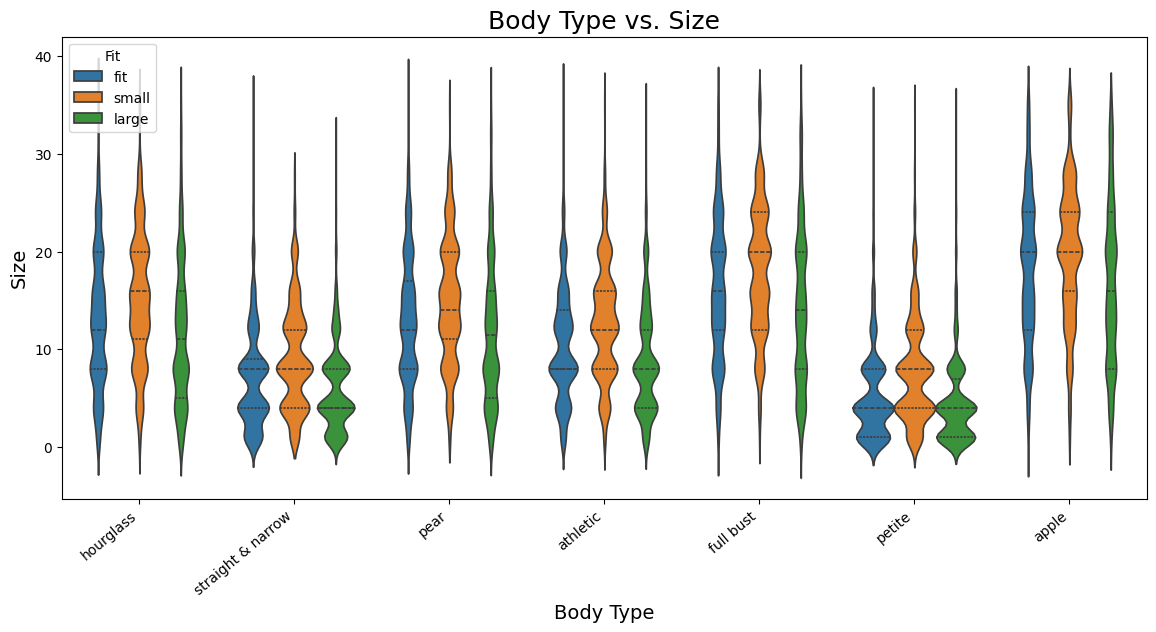

In [ ]:
plt.figure(figsize=(14,6))
b = sns.violinplot(
    x='body_type',
    y='size',
    data=df,
    hue='fit',
    dodge=True,   # Để hue tách ra
    inner="quartile",
    bw=0.2
)
b.set_xticklabels(b.get_xticklabels(), rotation=40, ha="right")
plt.title('Body Type vs. Size', size=18)
plt.xlabel('Body Type', size=14)
plt.ylabel('Size', size=14)
plt.legend(title='Fit', loc='upper left')
plt.show()

The plot shows that different body types are associated with different typical size distributions, but even within a single body type, there is still variation across "fit", "small", and "large". <br>
We may infer from the plot above that the majority of the individuals in this dataset have an apple and full bust body type. There isn't much of a variation in clothing sizes across different body types, with the exception of those with petite, straight, and narrow bodies who will select a lower size.

/tmp/ipython-input-36-1374956739.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rating'], color="b", rug=True)


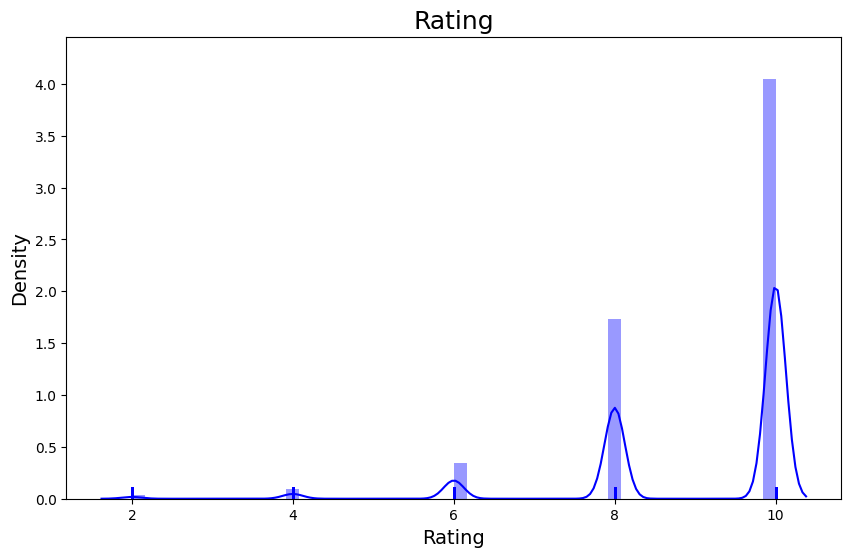

In [ ]:
#most of the clothes are betwen size 0 to 30, in every type.
plt.figure(figsize=(10,6))
sns.distplot(df['rating'], color="b", rug=True)
plt.title('Rating', size = 18)
plt.xlabel('Rating', size = 14)
plt.ylabel('Density', size = 14)
plt.show()

The rating distribution is highly skewed to the right, with the majority of ratings concentrated at 10. Most users gave very high scores, indicating a high level of satisfaction.

# Analytical Findings

### Text Analysis (Checking All Reviews Column)


In [ ]:
tdv = TfidfVectorizer()
tdv.fit(df.review_summary)
tdm = tdv.transform(df.review_summary)
tdv.vocabulary_

{'so': 9611,
 'many': 6419,
 'compliments': 2444,
 'felt': 4014,
 'glamourous': 4671,
 'it': 5603,
 'was': 11409,
 'great': 4835,
 'time': 10635,
 'to': 10666,
 'celebrate': 1956,
 'the': 10512,
 'almost': 594,
 'completion': 2425,
 'of': 7225,
 'my': 6927,
 'first': 4119,
 'year': 11790,
 'law': 5946,
 'school': 8986,
 'dress': 3331,
 'arrived': 816,
 'on': 7278,
 'and': 670,
 'in': 5427,
 'perfect': 7673,
 'condition': 2476,
 'love': 6244,
 'with': 11636,
 'this': 10563,
 'traditional': 10763,
 'touch': 10737,
 'sass': 8921,
 'literally': 6126,
 'cutest': 2817,
 'ever': 3728,
 'beautifully': 1194,
 'made': 6344,
 'received': 8398,
 'lots': 6229,
 'for': 4309,
 'black': 1358,
 'tie': 10610,
 'event': 3724,
 'everything': 3741,
 'masquerade': 6482,
 'ball': 1055,
 'we': 11446,
 'attended': 894,
 'fun': 4455,
 'wear': 11449,
 'wouldn': 11724,
 'normally': 7120,
 'buy': 1767,
 'stunning': 10108,
 'new': 7031,
 'eve': 3720,
 'wedding': 11472,
 'me': 6540,
 'feel': 4000,
 'confident': 2492

In [ ]:
def sentiment_analysis(df, text_col='review_summary'):
    afinn = Afinn()
    scores = df[text_col].apply(lambda x: afinn.score(str(x)))
    return scores

/tmp/ipython-input-39-1513133590.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scores)


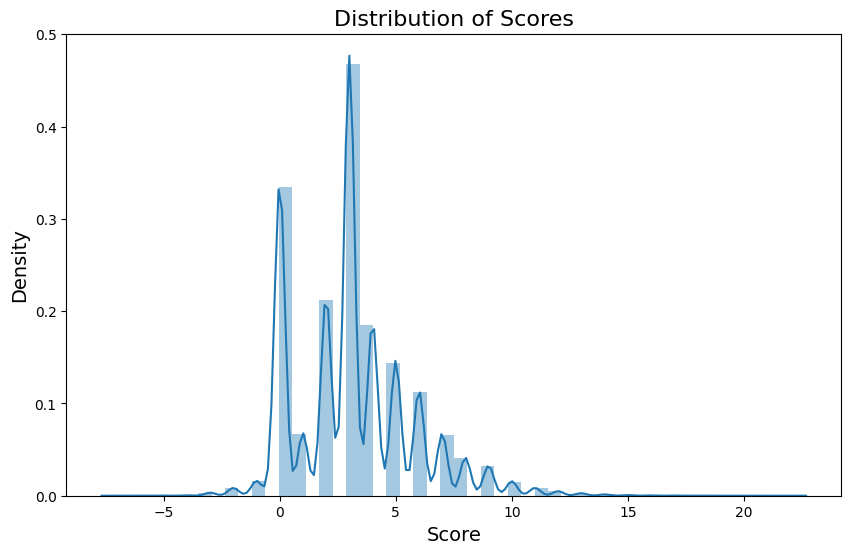

In [ ]:
scores = sentiment_analysis(df, text_col='review_summary')  # scores là 1 Series
plt.figure(figsize=(10,6))
sns.distplot(scores)
plt.title('Distribution of Scores', size = 16)
plt.xlabel('Score', size = 14)
plt.ylabel('Density', size = 14)
plt.show()

The distribution of sentiment scores is highly right-skewed.
Most review summaries have sentiment scores between 0 and 5, indicating a tendency toward mild positivity.
Very few reviews are extremely negative, and a small number are highly positive with scores above 10.

# WORDCLOUD

In [ ]:
def generate_wordcloud(texts, title='WordCloud'):
    text = ' '.join(texts)
    wc = WordCloud(background_color='white', width=1800, height=1200).generate(text)
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

wordcloud for 1k rv_sum

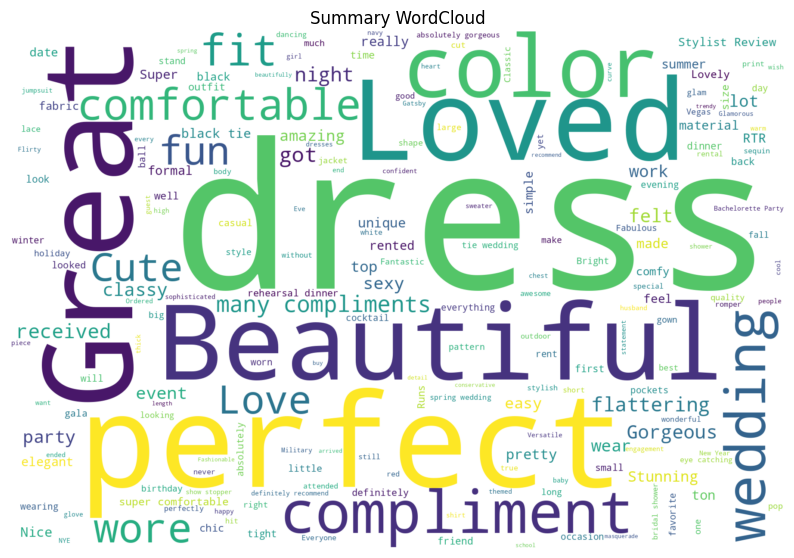

In [ ]:
generate_wordcloud(df.review_summary[:1000].dropna(), title='Summary WordCloud')

wordcloud for 1k rv_text

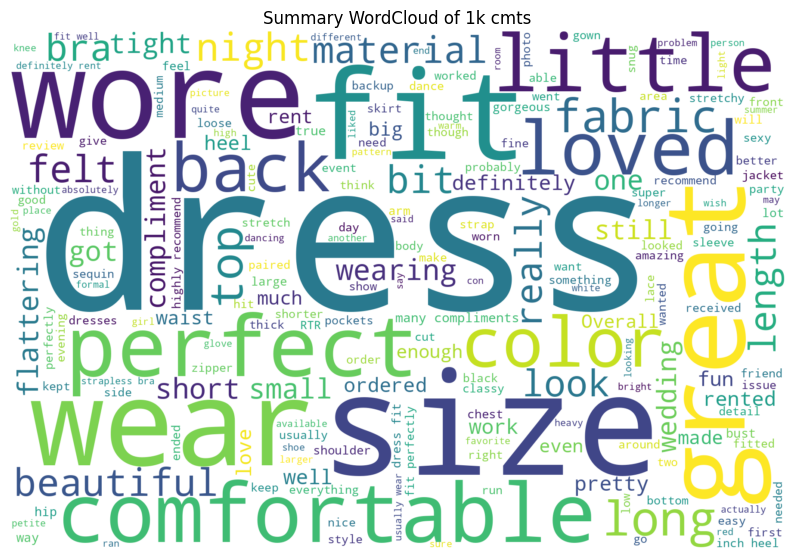

In [ ]:
generate_wordcloud(df.review_text[:1000].dropna(), title='Summary WordCloud of 1k cmts')

# sentiment score of 1k cmts (đánh giá tốt xấu quy ra điểm)

In [ ]:
# take 1k cmt
df1 = df.head(1000).copy()

# sentiment score of 1k cmts
df1['sent_score'] = sentiment_analysis(df1)

In [ ]:
df1['sent_score'].head()

0    2.0
1    3.0
2    6.0
3    3.0
4    3.0
Name: sent_score, dtype: float64

In [ ]:
df1['sent_score'].unique()

array([ 2.,  3.,  6.,  0.,  8.,  4.,  7.,  5.,  1.,  9., 13., 10., 11.,
       12., -1., -2.])

In [ ]:
df1_good = df1.loc[df1['sent_score'] > 5]
df1_bad = df1.loc[df1['sent_score'] < 0]
df1_good.head()

fit  user_id bust_size  item_id  weight  rating     rented_for  \
2     fit   360448       34b  1063761   130.0    10.0          party   
7     fit    86661      34d+   130259   118.0    10.0  formal affair   
11  large   533900       34b   130259   135.0     8.0        wedding   
14    fit   721308       34b   123793   118.0    10.0  formal affair   
32    fit   335467       34b  2155094   130.0    10.0           date   

                                          review_text  body_type  \
2   This hugged in all the right places! It was a ...  hourglass   
7   Fit was great. Maybe a little tight under the ...  full bust   
11  This dress was absolutely gorgeous and I recei...       pear   
14                        Fit great, super flattering   athletic   
32  I rented this for my birthday dinner at a down...     petite   

                                       review_summary  category  height  size  \
2   It was a great time to celebrate the (almost) ...    sheath    64.0     4   
7   Great dress, beautifully made.  I received lot...     dress    63.0     8   
11  Stunning dress, perfect for a New Year's Eve w...     dress    66.0     8   
14  Stunning gown. Wore this for heart ball and re...      gown    65.0     2   
32                               Love, love, love it!  jumpsuit    63.0     8   

      age review_date  sent_score  
2   116.0  2015-12-14         6.0  
7    65.0  2013-01-01         8.0  
11   30.0  2013-01-07         7.0  
14   32.0  2014-05-29         6.0  
32   29.0  2016-11-03         9.0

In [ ]:
df1_bad.head()
#>5 = good
#> 0 = bad
#0-5: bỏ vì nó là trung tính

fit  user_id bust_size  item_id  weight  rating     rented_for  \
187    fit   728134       34b   987536   180.0     6.0  formal affair   
205    fit   344452      36dd   938882   130.0     4.0       everyday   
232    fit   272374       34c   125465   145.0    10.0        wedding   
243  small   423263       36d   132738   130.0     8.0  formal affair   
248    fit   106267       32a  1764436   116.0     6.0           work   

                                           review_text  body_type  \
187  This dress was picked by RTR and provided to m...  full bust   
205  boxy and weird. oversized in shoulders even th...  hourglass   
232  I wore this for a black tie winter wedding, in...   athletic   
243  I am 5'11 and I ordered a Long, however I had ...   athletic   
248  I rented this dress thinking I would wear it t...   athletic   

                                        review_summary category  height  size  \
187  I would have worn this dress to an anniversary...     gown    64.0    34   
205  awkward shape for curvy bodies, even in the la...    dress    64.0    24   
232                         Red Dress, Cant be missed!     gown    68.0    12   
243  I had a baby three weeks before NYE and this d...     gown    70.0    25   
248                                          Well worn   sheath    65.0     4   

      age review_date  sent_score  
187  59.0  2016-05-02        -1.0  
205  30.0  2017-12-05        -2.0  
232  32.0  2014-03-28        -2.0  
243  33.0  2014-03-31        -1.0  
248  42.0  2017-12-18        -1.0

In [ ]:
nltk.download('stopwords')
STOPWORDS = list(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


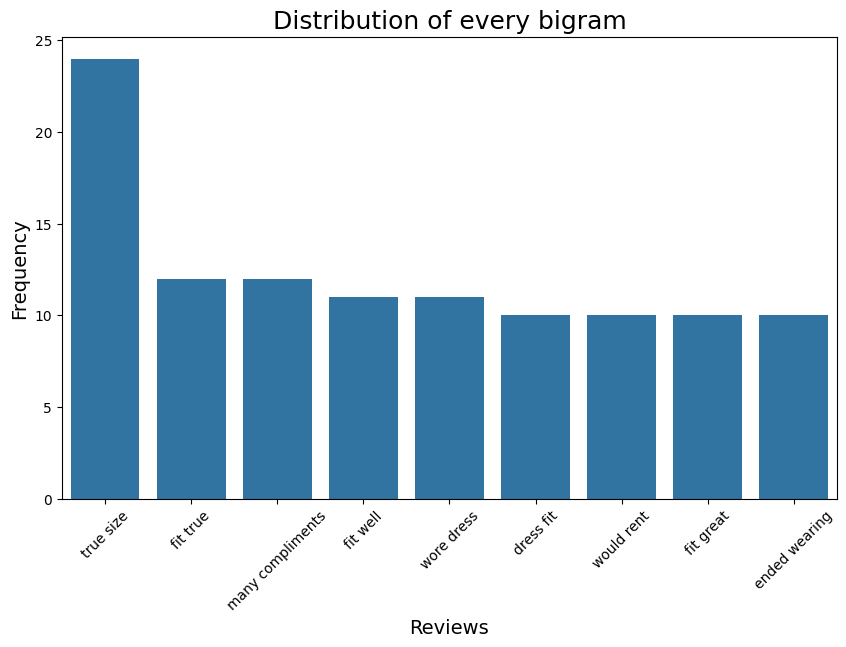

In [ ]:
#good comments diagram
plt.figure(figsize=(10,6))
cv = CountVectorizer(ngram_range=(2,2),stop_words=STOPWORDS)
tokens = cv.fit_transform(df1_good['review_text'])

sum_words = tokens.sum(axis=0)
words_freq = [[word, sum_words[0, idx]] for word, idx in cv.vocabulary_.items()]
sorted(words_freq, key = lambda x: x[1], reverse=True)[:10]

good_comm=pd.DataFrame()
bigram=[]
freq=[]
for i in words_freq:
  bigram.append(i[0])
  freq.append(i[1])

good_comm['bigram']=bigram
good_comm['freq']=freq

good_comm.sort_values(by='freq',ascending=False,inplace=True)

good_comm_sub=good_comm.iloc[0:9]
sns.barplot(x='bigram',y='freq',data=good_comm_sub)
plt.xticks(rotation=45)
plt.title('Distribution of every bigram', size = 18)
plt.xlabel('Reviews', size = 14)
plt.ylabel('Frequency', size = 14)
plt.show()

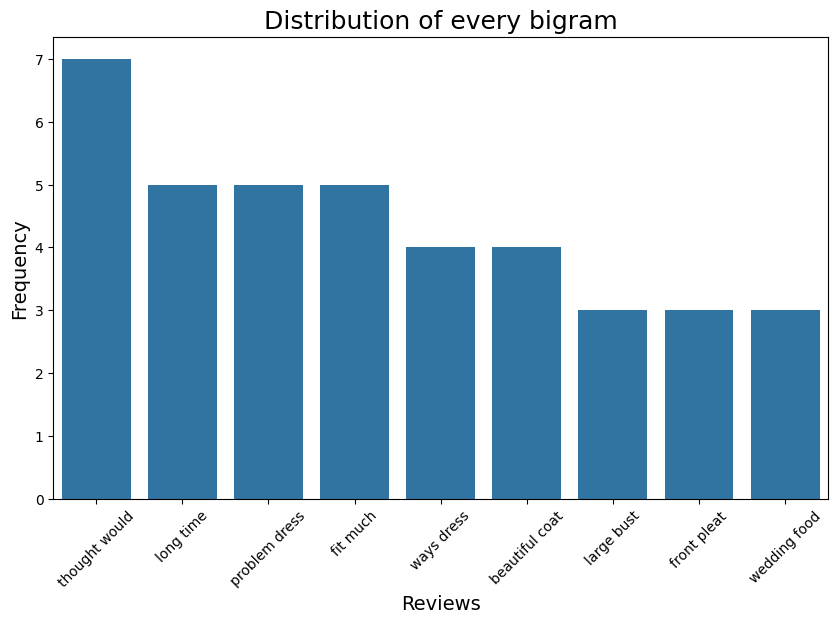

In [ ]:
#bad comments diagram
plt.figure(figsize=(10,6))
cv2 = CountVectorizer(ngram_range=(2,2),stop_words=STOPWORDS)
tokens2 = cv2.fit_transform(df1_bad['review_text'])

sum_words2 = tokens2.sum(axis=0)
words_freq2 = [[word, sum_words[0, idx]] for word, idx in cv2.vocabulary_.items()]

bad_comm=pd.DataFrame()
bigram2=[]
freq2=[]
for i in words_freq2:
  bigram2.append(i[0])
  freq2.append(i[1])

bad_comm['bigram']=bigram2
bad_comm['freq']=freq2

bad_comm.sort_values(by='freq',ascending=False,inplace=True)

bad_comm_sub=bad_comm.iloc[0:9]
sns.barplot(x='bigram',y='freq',data=bad_comm_sub)
plt.xticks(rotation=45)
plt.title('Distribution of every bigram', size = 18)
plt.xlabel('Reviews', size = 14)
plt.ylabel('Frequency', size = 14)
plt.show()

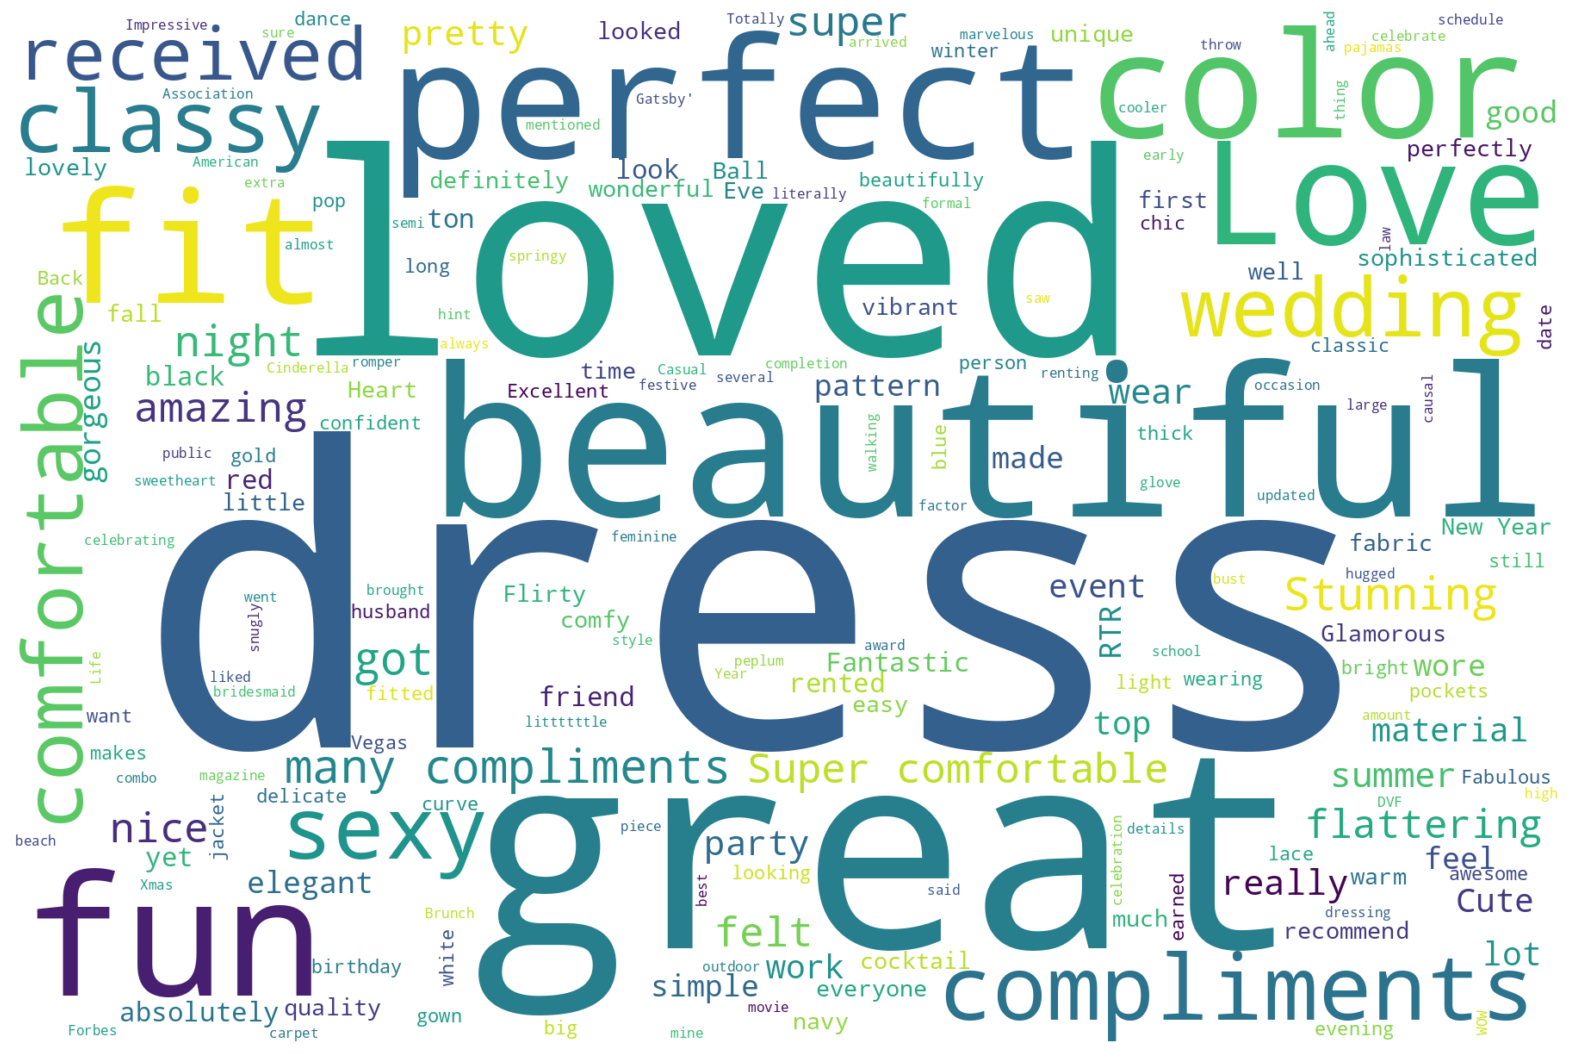

In [ ]:
reviews = df1_good['review_summary']

# combine all reviews into a single string
text = ' '.join(reviews)

# word cloud of good rv
wc = WordCloud(background_color="white",width=1800, height=1200).generate(text)

# diagram
plt.figure(figsize=(20, 16))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df1_good.sent_score.describe()

count    177.000000
mean       7.542373
std        1.722070
min        6.000000
25%        6.000000
50%        7.000000
75%        8.000000
max       13.000000
Name: sent_score, dtype: float64

In [ ]:
corpus = []  # khởi tạo một danh sách rỗng để lưu trữ dữ liệu văn bản
for words in df1_good['review_text']:
  corpus.append(words)

In [ ]:
nlp = spacy.load("en_core_web_sm")
doc=list(nlp.pipe(corpus))
doc

[This hugged in all the right places! It was a perfect dress for my event and I received so many compliments on it. Not to mention customer service was great getting this to me in less than 24 hours!,
 Fit was great. Maybe a little tight under the arms. ,
 This dress was absolutely gorgeous and I received so many compliments!  I wore it to a black tie NYE wedding, and even though it was short, I felt like the fabric, fit, and the way it sparkled made it fit in just fine with the other formal gowns.  I usually wear a 6 or an 8 in dresses.  I ordered a 4 and a 6, and true to other reviewers' comments, the 4 fit me very well.  The chest area was just a tad loose, but that typically happens when I try on dresses...nothing a more padded bra couldn't fix!  The cut and fit were very figure flattering.  By the end of the evening I experience a little chafing under my arms from the sequins, but that was after 5 hours and it was very minor.  Thank you RTR for a great first experience, I'll defin

# Clustering Analysis

## PCA and one-hot ecoding

In [ ]:
# one-hot encode 'bust_size' and 'body_type' columns
df1_dummified = pd.get_dummies(df1, columns=['bust_size', 'body_type'])

# drop unnecessary columns
df1_num = df1_dummified.drop(columns=['fit', 'user_id', 'item_id', 'rating', 'rented_for',
                                      'review_text', 'review_summary', 'size', 'review_date', 'category'], axis=1)

# standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df1_num)

# apply PCA
pca = PCA()
pcs = pca.fit_transform(data_scaled)

# get the actual number of principal components
n_components = pcs.shape[1]
df1_clust = pd.DataFrame(pcs[:, :n_components], columns=[f'pc{i}' for i in range(1, n_components+1)])
df1_sample = df1_clust.sample(1000, random_state=820)

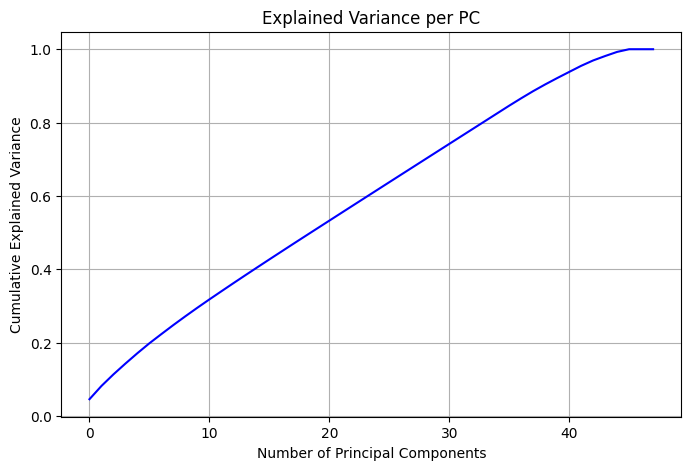

In [ ]:
# tính explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratio), color='blue')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance per PC')
plt.grid(True)
plt.show()

In [ ]:
n_components

48

In [ ]:
df1_clust

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0    1.002648  0.874936 -0.626556 -1.133401  0.500432 -0.188274 -0.789008   
1   -0.832565 -1.303025 -0.108633 -0.764475 -2.562542  0.744495  0.696284   
2    0.348038  2.233702  1.376370 -0.296143  0.024429  3.520077  4.015075   
3    0.012642 -0.986853 -0.189760  1.148413  0.339510 -0.240182 -1.357180   
4    0.482276 -1.917537 -0.475262 -0.365719  0.299528  1.558624  0.377330   
..        ...       ...       ...       ...       ...       ...       ...   
995 -2.863795  0.790436  0.797136  0.765035  0.007194 -1.157549  0.920380   
996  0.099196  1.382951 -1.220930 -0.977096 -0.424564 -0.516187  0.654111   
997 -1.032036  2.367665 -0.784435 -0.523036  0.214668 -0.315744  0.536677   
998  1.698973  1.327710 -2.699427 -1.145523 -1.858477 -0.467043 -0.159014   
999 -0.069294  0.286624  1.928354 -1.232604  0.757199 -0.608535 -1.084811   

          pc8       pc9      pc10  ...      pc39      pc40      pc41  \
0    0.198813 -0.357269 -1.631204  ... -0.360444 -0.281746 -0.707488   
1    0.699114  0.789842  0.036600  ...  0.261105 -1.042860  0.058725   
2   -1.579517  3.490325 -0.269279  ...  1.068892 -0.993889  4.731758   
3   -1.239986  0.298026  1.785257  ... -0.525316 -0.804357 -0.177639   
4    1.187778 -0.512751  0.151076  ... -0.298932  0.808226 -0.649955   
..        ...       ...       ...  ...       ...       ...       ...   
995 -0.540751 -0.515348  1.688758  ... -0.911443  0.721755 -0.274290   
996 -0.824066 -0.912948 -0.226111  ... -0.811835  0.812414 -1.236998   
997 -0.700152 -0.128658 -0.403994  ... -0.066398  0.774665 -0.464048   
998 -2.050849 -2.363580  0.244268  ...  2.970055 -0.169893 -0.502601   
999  0.144473 -0.129358  1.982344  ... -0.006265 -1.191394 -0.158438   

         pc42      pc43      pc44      pc45      pc46          pc47  \
0   -0.612752  0.306035  0.623859  0.310432 -0.462654  2.536958e-15   
1    0.377947 -1.050887  0.106985 -1.237229  0.417556  3.438631e-15   
2    4.524777  2.658853  0.394373  1.366694  0.652421  1.759802e-15   
3    0.967594  0.009464  0.195411 -0.070709 -0.362548  3.341870e-15   
4   -0.329169 -0.366571  0.515039  0.240877  0.043382 -3.624780e-15   
..        ...       ...       ...       ...       ...           ...   
995 -0.091638  0.382197  0.867501  1.268379  0.271694  3.369625e-15   
996  0.123823 -0.050772  0.325988  0.613438 -0.307493  2.981047e-15   
997  0.837673  0.183283 -0.580725 -0.361978  0.192791  2.610007e-16   
998  2.317864 -1.112805 -0.816053 -0.567328 -1.429303 -2.847624e-15   
999  0.173063 -1.376745 -2.367439  1.068548  0.216222  4.701893e-15   

             pc48  
0    1.323066e-15  
1    1.068872e-15  
2   -2.590470e-15  
3   -4.810461e-16  
4    3.293712e-15  
..            ...  
995 -1.979847e-15  
996  3.516211e-16  
997  4.626434e-16  
998 -2.174136e-15  
999 -2.368425e-15  

[1000 rows x 48 columns]

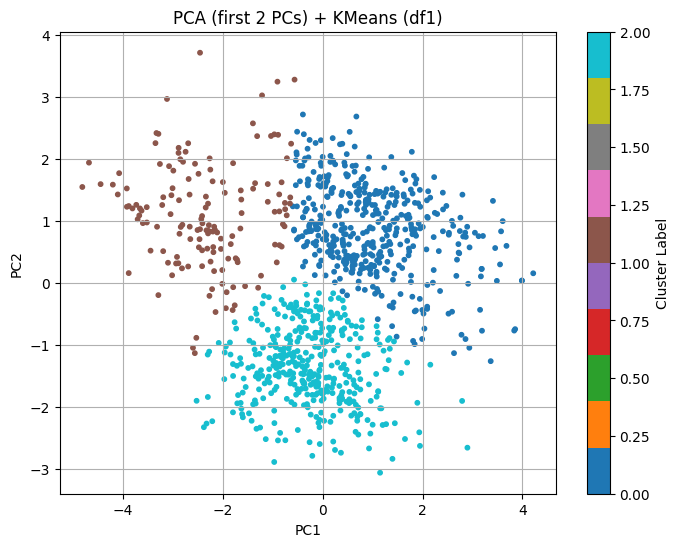

In [ ]:
# Kmeans PCA
kmeans = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans.fit_predict(df1_sample[['pc1', 'pc2']])

# visualize
plt.figure(figsize=(8, 6))
plt.scatter(df1_sample['pc1'], df1_sample['pc2'], c=labels_pca, cmap='tab10', s=10)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA (first 2 PCs) + KMeans (df1)')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()


In [ ]:
# 2. UMAP + KMeans flow (based on the second figure, using df1)
# drop columns ko cần
df1_drop = df1.drop(columns=['fit', 'user_id', 'item_id', 'rating',
                             'review_text', 'review_summary', 'review_date', 'category'])

# one-hot encode categorical columns còn lại
encoded_df1 = pd.get_dummies(df1_drop)

# apply UMAP for dimensionality reduction
reducer = umap.UMAP(random_state=42)
reduced_data = reducer.fit_transform(encoded_df1)

# perform KMeans clustering on UMAP output
kmeans_umap = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans_umap.fit_predict(reduced_data)

# assign cluster labels back to df1
df1['cluster'] = cluster_labels

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
from sklearn.manifold import trustworthiness

score = trustworthiness(encoded_df1, reduced_data, n_neighbors=5)
print("UMAP trustworthiness score:", score)



UMAP trustworthiness score: 0.9881252016129032


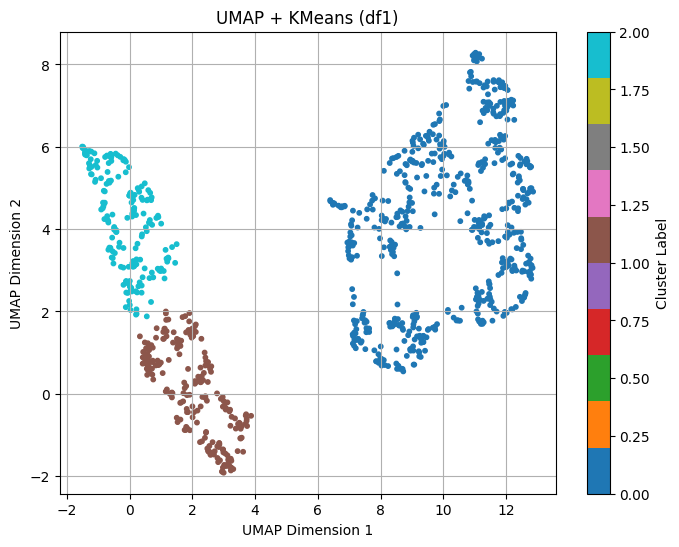

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='tab10', s=10)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP + KMeans (df1)')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()


In [ ]:
df1['cluster'] = cluster_labels  # labels gán df1

# avg of height and weight by cluster
df1.groupby('cluster')[['height', 'weight']].mean()

height      weight
cluster                       
0        64.651361  124.588435
1        66.039823  140.137168
2        66.435484  162.768817

In [ ]:
df1.groupby('cluster')['item_id'].count()

cluster
0    588
1    226
2    186
Name: item_id, dtype: int64

In [ ]:
print(np.unique(labels_pca))

[0 1 2]


In [ ]:
df1.head()

fit  user_id bust_size  item_id  weight  rating     rented_for  \
0  fit   420272       34d  2260466   137.0    10.0       vacation   
1  fit   273551       34b   153475   132.0    10.0          other   
2  fit   360448       34b  1063761   130.0    10.0          party   
3  fit   909926       34c   126335   135.0     8.0  formal affair   
4  fit   151944       34b   616682   145.0    10.0        wedding   

                                         review_text          body_type  \
0  An adorable romper! Belt and zipper were a lit...          hourglass   
1  I rented this dress for a photo shoot. The the...  straight & narrow   
2  This hugged in all the right places! It was a ...          hourglass   
3  I rented this for my company's black tie award...               pear   
4  I have always been petite in my upper body and...           athletic   

                                      review_summary category  height  size  \
0                               So many compliments!   romper    68.0    14   
1                            I felt so glamourous!!!     gown    66.0    12   
2  It was a great time to celebrate the (almost) ...   sheath    64.0     4   
3   Dress arrived on time and in perfect condition.     dress    65.0     8   
4                    Was in love with this dress !!!     gown    69.0    12   

     age review_date  sent_score  cluster  
0   28.0  2016-04-20         2.0        1  
1   36.0  2013-06-18         3.0        0  
2  116.0  2015-12-14         6.0        0  
3   34.0  2014-02-12         3.0        1  
4   27.0  2016-09-26         3.0        1

## Elbow method

In [ ]:
df1

fit  user_id bust_size  item_id  weight  rating     rented_for  \
0       fit   420272       34d  2260466   137.0    10.0       vacation   
1       fit   273551       34b   153475   132.0    10.0          other   
2       fit   360448       34b  1063761   130.0    10.0          party   
3       fit   909926       34c   126335   135.0     8.0  formal affair   
4       fit   151944       34b   616682   145.0    10.0        wedding   
...     ...      ...       ...      ...     ...     ...            ...   
1021    fit   177016       32b  1475816   125.0    10.0        wedding   
1022    fit   547738       32d  1340234   128.0    10.0        wedding   
1023    fit   316065       32d  1585757   118.0    10.0  formal affair   
1024    fit   192770      38dd   126335   130.0    10.0          other   
1025  large   691468       34c   331370   125.0    10.0           work   

                                            review_text          body_type  \
0     An adorable romper! Belt and zipper were a lit...          hourglass   
1     I rented this dress for a photo shoot. The the...  straight & narrow   
2     This hugged in all the right places! It was a ...          hourglass   
3     I rented this for my company's black tie award...               pear   
4     I have always been petite in my upper body and...           athletic   
...                                                 ...                ...   
1021  Super comfortable fabric, conservative overall...             petite   
1022  Loved this dress and got so many compliments! ...          hourglass   
1023  I had to wear really high heels so it didn't d...          hourglass   
1024    Con: Zipper is a little difficult to work with.          hourglass   
1025  i'm typically a 2/4 but equipment runs large s...          full bust   

                                         review_summary category  height  \
0                                  So many compliments!   romper    68.0   
1                               I felt so glamourous!!!     gown    66.0   
2     It was a great time to celebrate the (almost) ...   sheath    64.0   
3      Dress arrived on time and in perfect condition.     dress    65.0   
4                       Was in love with this dress !!!     gown    69.0   
...                                                 ...      ...     ...   
1021                 Tons of compliments on this dress!    dress    66.0   
1022                              Easy to wear, unique     dress    68.0   
1023  Fancy without being over the top. Got lots of ...     gown    62.0   
1024  Wore this to the after party of my wedding. Go...    dress    67.0   
1025                        awesome casual/work dress!     dress    63.0   

      size    age review_date  sent_score  cluster  
0       14   28.0  2016-04-20         2.0        1  
1       12   36.0  2013-06-18         3.0        0  
2        4  116.0  2015-12-14         6.0        0  
3        8   34.0  2014-02-12         3.0        1  
4       12   27.0  2016-09-26         3.0        1  
...    ...    ...         ...         ...      ...  
1021     4   35.0  2017-09-08         2.0        0  
1022     4   30.0  2017-11-06         1.0        0  
1023     4   38.0  2017-03-23         4.0        0  
1024    20   27.0  2016-01-22         2.0        0  
1025     4   31.0  2017-01-12         4.0        0  

[1000 rows x 17 columns]

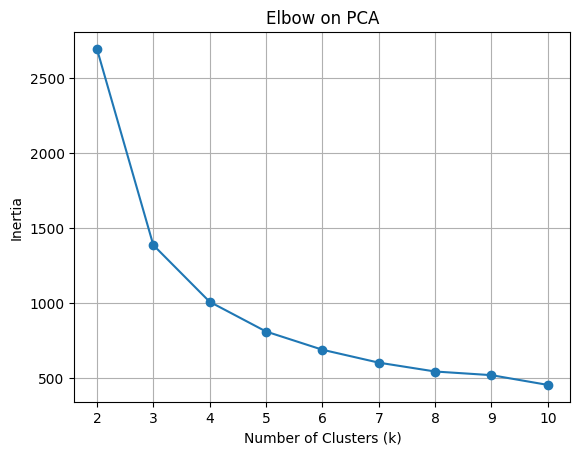

In [ ]:
data = df1_sample[['pc1', 'pc2']]

inertias = []
for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data)
    inertias.append(model.inertia_)

plt.plot(range(2,11), inertias, marker='o')
plt.title('Elbow on PCA')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


Using the Elbow Method, the optimal number of clusters was determined to be 3, as inertia significantly decreased up to 3 clusters and flattened out afterward.

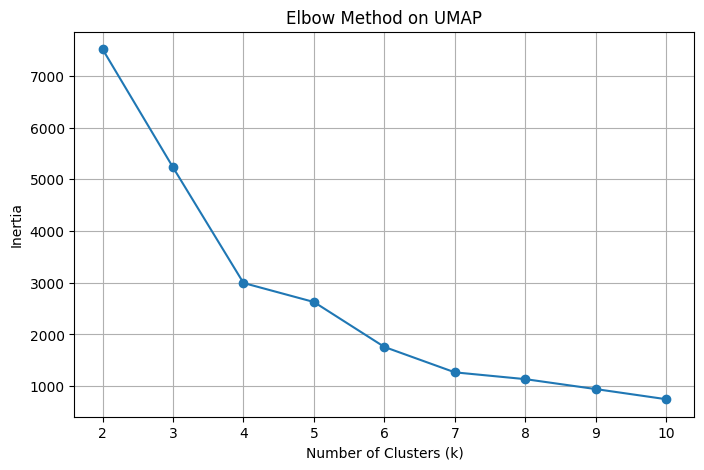

In [ ]:
inertias = []
for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(reduced_data)
    inertias.append(model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertias, marker='o')
plt.title('Elbow Method on UMAP')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

## Silhouette analyses

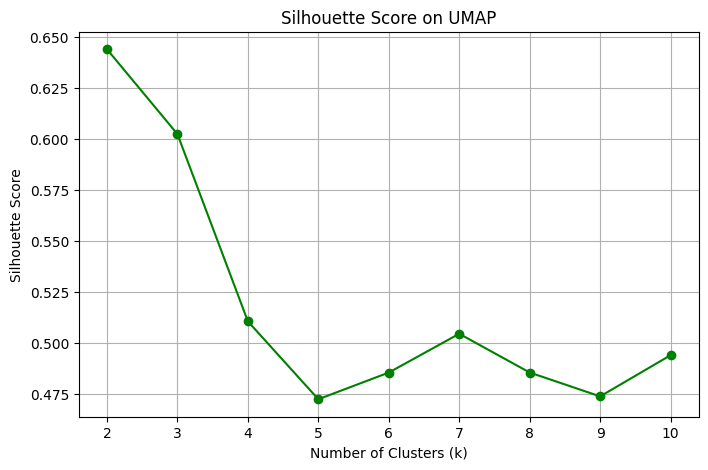

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

sil_scores = []
K_range = range(2, 11)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(reduced_data)
    score = silhouette_score(reduced_data, labels)
    sil_scores.append(score)

# plot
plt.figure(figsize=(8, 5))
plt.plot(K_range, sil_scores, marker='o', color='green')
plt.title('Silhouette Score on UMAP')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


Both Elbow and Silhouette analyses consistently suggest that the optimal number of clusters for this dataset is either 2 or 3, with k=3 slightly favored for finer segmentation.

In [ ]:
def wordcloud_keybert(text):
    wc = WordCloud(background_color="white")
    kw_model = KeyBERT()
    st = ''
    for j in text:
        foo = " ".join(j.split())
        try:
            keywords = kw_model.extract_keywords(foo, keyphrase_ngram_range=(1, 1), stop_words='english',
                                                 use_maxsum=True, nr_candidates=20, top_n=5)
            for i in keywords:
                st += (i[0] + ' ')
        except:
            print("Error in line")
    wordcloud = wc.generate(st)
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("WordCloud by KeyBERT", fontsize=16)
    plt.show()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

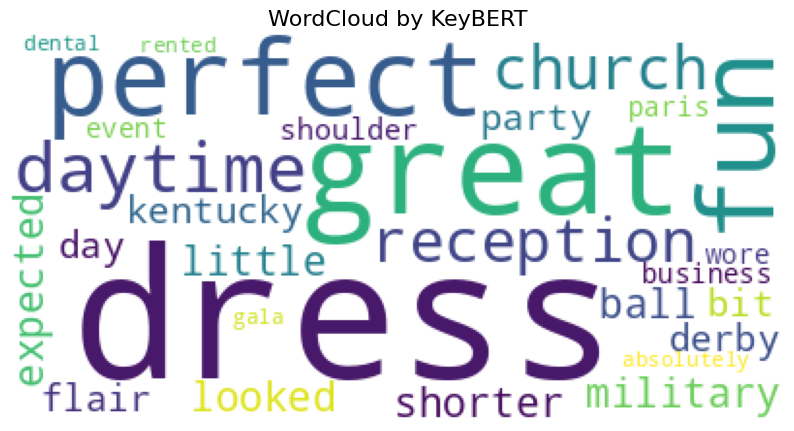

In [ ]:
# cluster = 0
wordcloud_keybert(df1[df1['cluster'] == 0]['review_summary'].dropna().sample(20, random_state=5103))

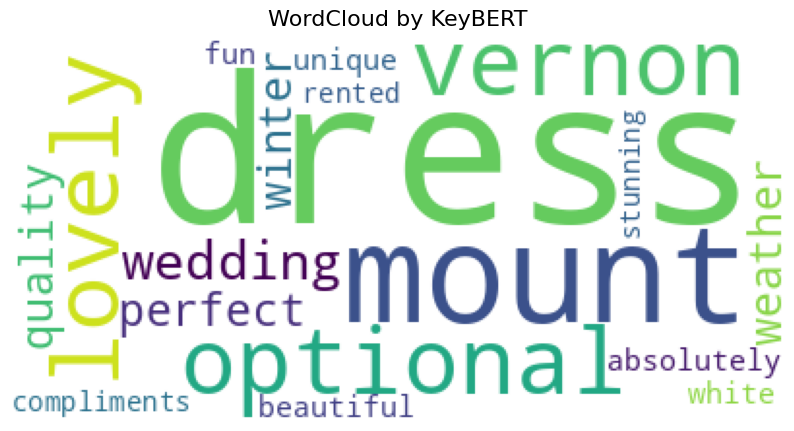

In [ ]:
# cluster = 1
wordcloud_keybert(df1[df1['cluster'] == 1]['review_summary'].dropna().sample(20, random_state=5103))

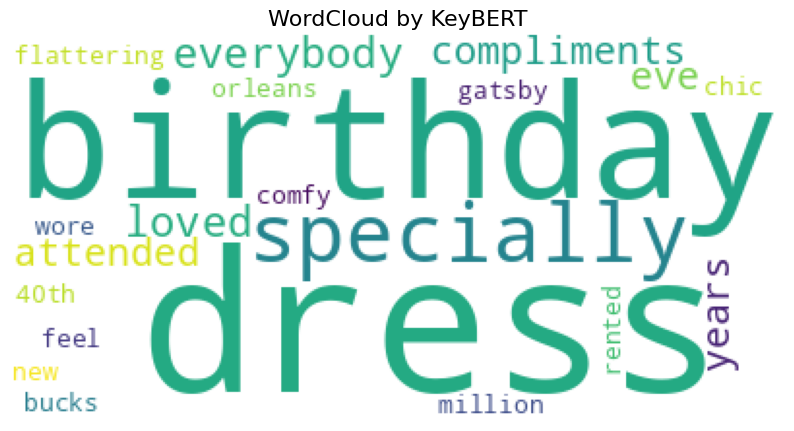

In [ ]:
# cluster = 2
wordcloud_keybert(df1[df1['cluster'] == 2]['review_summary'].dropna().sample(20, random_state=5103))

In [ ]:
# ================== 1. Train Size Predictor ==================
def train_size_predictor(df):
    # Encode categorical features
    df = df.copy()
    df['body_type_encoded'] = df['body_type'].astype('category').cat.codes
    df['fit_type_encoded'] = df['fit_type'].astype('category').cat.codes

    # features set by best performance
    features = df[['height', 'weight', 'age', 'body_type_encoded', 'fit_type_encoded']]
    target = df['size']

    model = RandomForestRegressor(n_estimators=500, random_state=42)
    model.fit(features, target)
    return model


In [ ]:
# ================== 2. Prepare Combined Vectors ==================
def prepare_combined_vectors(df, tfidf_max_features=300):
    tfidf = TfidfVectorizer(max_features=tfidf_max_features)
    tfidf_vectors = tfidf.fit_transform(df['review_summary'].fillna(''))

    numeric_cols = ['weight', 'height', 'age', 'rating', 'sent_score']
    df_numeric = df[numeric_cols].fillna(df[numeric_cols].mean())
    scaler = StandardScaler()
    numeric_vectors = scaler.fit_transform(df_numeric)

    # combine and convert to csr
    combined_vectors = hstack([tfidf_vectors, numeric_vectors]).tocsr()

    return combined_vectors

In [ ]:
# ================== 3. Prepare KNN model ==================
def prepare_knn(combined_vectors, n_neighbors=6):
    knn = NearestNeighbors(n_neighbors=n_neighbors, algorithm='brute', metric='cosine')
    knn.fit(combined_vectors)
    return knn


In [ ]:
# ================== 4. Recommend Items ==================
def recommend_items(knn, combined_vectors, query_idx, df, n_neighbors=10):
    # lấy vector đặc trưng của item được chọn
    query_vector = combined_vectors[query_idx]

    # KNN
    distances, indices = knn.kneighbors(query_vector.toarray(), n_neighbors=n_neighbors+1)

    # flatten kết quả và loại bỏ chính nó
    similar_indices = indices.flatten()
    similar_indices = [i for i in similar_indices if i != query_idx]

    # lọc kết quả để loại trùng item_id và đa dạng category
    seen_items = set()
    seen_categories = set()
    final_indices = []

    for i in similar_indices:
        item_id = df.iloc[i]['item_id']
        category = df.iloc[i]['category']
        if item_id not in seen_items and category not in seen_categories:
            final_indices.append(i)
            seen_items.add(item_id)
            seen_categories.add(category)
        if len(final_indices) == 5:
            break

    return final_indices


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(df1['review_summary'])


TfidfVectorizer()

In [ ]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(vectorizer.transform(df1['review_summary']))


KMeans(n_clusters=3, random_state=42)

In [ ]:
# predict cluster cho toàn bộ df1
df1['cluster'] = kmeans_model.predict(vectorizer.transform(df1['review_summary']))

#'samall', 'fit', 'large' = 0 1 2
cluster_to_fit = {0: 'small', 1: 'fit', 2: 'large'}
df1['fit_type'] = df1['cluster'].map(cluster_to_fit)

# lookup_dict = group theo body_type và fit_type
lookup_dict = (
    df1.groupby(['body_type', 'fit_type'])['size']
    .median()
    .unstack(fill_value=None)
    .apply(lambda row: row.dropna().to_dict(), axis=1)
    .to_dict()
)
def recommend_size_lookup(body_type, cluster):
    cluster_to_fit = {0: 'small', 1: 'fit', 2: 'large'}
    fit_label = cluster_to_fit.get(cluster, 'fit')
    return lookup_dict.get(body_type, {}).get(fit_label, None)

In [ ]:
def full_flow(df1):
    # train model
    size_model = train_size_predictor(df1)

    # prepare KNN model
    df1 = df1[df1['sent_score'] > 0].copy()
    combined_vectors = prepare_combined_vectors(df1)
    knn_model = prepare_knn(combined_vectors)

    # input user info
    print("Enter your info to get size recommendation:")
    try:
        height = input("Enter your height in inches (or leave blank): ").strip()
        weight = input("Enter your weight in lbs (or leave blank): ").strip()
        age = input("Enter your age (or leave blank): ").strip()

        if height and weight and age:
            # case1: predict bằng model
            height = int(height)
            weight = int(weight)
            age = int(age)
            body_type_input = input("Enter your body type (e.g., hourglass, petite): ").strip()
            fit_type_input = input("Enter fit type (small / fit / large): ").strip()

            # encode body_type
            body_type_cat = df1['body_type'].astype('category')
            body_type_code = body_type_cat.cat.categories.get_loc(body_type_input)

            # encode fit_type
            fit_map = {'small': 0, 'fit': 1, 'large': 2}
            fit_type_code = fit_map.get(fit_type_input.lower(), 1)

            input_df = pd.DataFrame([{
                'height': height,
                'weight': weight,
                'age': age,
                'body_type_encoded': body_type_code,
                'fit_type_encoded': fit_type_code
            }])

            predicted_size = size_model.predict(input_df)[0]
            print(f"Recommended Size: {round(predicted_size)}")

        else:
            # case2: fallback nếu thiếu thông tin
            body_type = input("Enter your body type (e.g., apple, pear, petite): ").strip()
            review_text = input("How do you usually describe clothing fit? (e.g., 'tight at waist', 'very comfy'): ").strip()

            # vectorize + predict cluster
            user_vec = vectorizer.transform([review_text])
            predicted_cluster = kmeans_model.predict(user_vec)[0]

            cluster_to_fit = {0: 'small', 1: 'fit', 2: 'large'}
            fit_type = cluster_to_fit.get(predicted_cluster, 'fit')

            fallback = recommend_size_lookup(body_type, fit_type)

            if fallback:
                print(f"Fallback Recommended Size: {fallback}")
            else:
                print("No fallback size found.")
                return

    except Exception as e:
        print(f"Error: {e}")
        return

    # show available products
    print("Available items:")
    filtered_df = df[df['rating'] > 5].copy()

    # unique item_id
    display_df = (
    filtered_df
    .sort_values('rating', ascending=False)  # ưu tiên rating cao
    .groupby('category')  # group theo category
    .apply(lambda x: x.sample(1))  # lấy 1 item mỗi category
    .reset_index(drop=True)
    .head(10)
)
    display_df.index = range(len(display_df))
    print(display_df[['item_id', 'category', 'review_summary']])

    #recommend similar items
    try:
        input_index = int(input("Enter the index of the item to find similar items: ").strip())
        if 0 <= input_index < len(display_df):
            selected_item = display_df.loc[input_index]
            selected_category = selected_item['category']
            selected_item_id = selected_item['item_id']

            #item cùng category, khác item_id
            similar_items = df[
                (df['category'] == selected_category) &
                (df['item_id'] != selected_item_id)
            ][['item_id', 'category', 'review_summary', 'height', 'weight', 'age', 'rating']]

            similar_items = similar_items.drop_duplicates(subset='item_id').head(5)
            pd.set_option('display.width', 200)
            pd.set_option('display.max_colwidth', None)
            similar_items['review_summary'] = similar_items['review_summary'].apply(lambda x: x[:50] + '...' if len(x) > 50 else x)
            print("Recommended similar items:")
            print(similar_items)

        else:
            print(f"Invalid index. Please enter a number between 0 and {len(display_df)-1}")
    except ValueError:
        print("Invalid input. Please enter an integer.")


In [ ]:
full_flow(df1)

Enter your info to get size recommendation:
Enter your height in inches (or leave blank): 68
Enter your weight in lbs (or leave blank): 120
Enter your age (or leave blank): 23
Enter your body type (e.g., hourglass, petite): pear
Enter fit type (small / fit / large): small
Recommended Size: 7
Available items:


/tmp/ipython-input-82-422649344.py:79: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(1))  # lấy 1 item mỗi category


   item_id    category                                                                 review_summary
0  1501483    ballgown                                                       incredibly\ncomfortable!
1  2195049      blazer                                                                       Too big 
2  2637067      blouse                                                                TEAM RTR REVIEW
3  1467075     blouson  Beautiful dress that I wore to work and to drinks. Got a lot of compliments. 
4  2651766      bomber                      Love this! Didn't want to take it off, or give it back :)
5  2849197  buttondown                                                             RTR Stylist Review
6  1420024      caftan                                             Super cute oversize beach cover-up
7  2440850        cami               The perfect Summer or Spring  top. Silk, pretty and flattering. 
8  2115784        cape                                  Amazing - so many complime

In [ ]:
# Input của người dùng
input_height = 68
input_weight = 120
input_age = 23

# lọc những người có thông số tương đương (chênh lệch nhỏ)
nearby_users = df1[
    (df['height'].between(input_height - 2, input_height + 2)) &
    (df['weight'].between(input_weight - 5, input_weight + 5)) &
    (df['age'].between(input_age - 2, input_age + 2))
]

print(nearby_users[['height', 'weight', 'age', 'size']])

     height  weight   age  size
23     66.0   120.0  21.0     1
302    69.0   125.0  23.0     4
397    66.0   120.0  23.0     1
852    69.0   122.0  24.0     2
873    66.0   125.0  25.0     4


/tmp/ipython-input-84-3989110465.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nearby_users = df1[


In [ ]:
# Encode categorical variables
df1['body_type_encoded'] = df1['body_type'].astype('category').cat.codes
df1['fit_type_encoded'] = df1['fit_type'].astype('category').cat.codes

# features test
feature_sets = {
    'height, weight, age': ['height', 'weight', 'age'],
    '+ body_type': ['height', 'weight', 'age', 'body_type_encoded'],
    '+ fit_type': ['height', 'weight', 'age', 'fit_type_encoded'],
    '+ body_type + fit_type': ['height', 'weight', 'age', 'body_type_encoded', 'fit_type_encoded']
}

results_split = {}
results_full = {}

# hàm đánh giá
def evaluate(X, y):
    model = RandomForestRegressor(n_estimators=500, random_state=42)
    model.fit(X, y)
    pred = model.predict(X)
    return (
        round(mean_absolute_error(y, pred), 3),
        round(np.sqrt(mean_squared_error(y, pred)), 3),
        round(r2_score(y, pred), 3)
    )

# train test split 80/20
for label, features in feature_sets.items():
    subset = df1[features + ['size']].dropna()
    X = subset[features]
    y = subset['size']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=500, random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    results_split[label] = (
        round(mean_absolute_error(y_test, pred), 3),
        round(np.sqrt(mean_squared_error(y_test, pred)), 3),
        round(r2_score(y_test, pred), 3)
    )

# full data train
for label, features in feature_sets.items():
    subset = df1[features + ['size']].dropna()
    X = subset[features]
    y = subset['size']
    results_full[label] = evaluate(X, y)

print("=== Train/Test Split (80/20) ===")
for k, v in results_split.items():
    print(f"{k:<30}: MAE = {v[0]}, RMSE = {v[1]}, R2 = {v[2]}")

print("\n=== Full Training (No Split) ===")
for k, v in results_full.items():
    print(f"{k:<30}: MAE = {v[0]}, RMSE = {v[1]}, R2 = {v[2]}")


=== Train/Test Split (80/20) ===
height, weight, age           : MAE = 3.864, RMSE = 5.129, R2 = 0.396
+ body_type                   : MAE = 3.658, RMSE = 5.02, R2 = 0.421
+ fit_type                    : MAE = 3.829, RMSE = 5.111, R2 = 0.4
+ body_type + fit_type        : MAE = 3.634, RMSE = 4.962, R2 = 0.435

=== Full Training (No Split) ===
height, weight, age           : MAE = 1.859, RMSE = 2.737, R2 = 0.853
+ body_type                   : MAE = 1.552, RMSE = 2.208, R2 = 0.904
+ fit_type                    : MAE = 1.664, RMSE = 2.379, R2 = 0.889
+ body_type + fit_type        : MAE = 1.479, RMSE = 2.035, R2 = 0.919
